In [1]:
#network X implementation

#things to do:
#bipartite projections
#network of islands with (1/?) distance as edge weights -> most central, etc...
#network of same species, but one node for each island 

#using https://gist.github.com/lsheble/fb0c48d2462e3cc3c8e0
#https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.bipartite.html
#could redundancy be useful? 

#1.1 can do bipartite structure, but nodes are cramped
#try https://stackoverflow.com/questions/3567018/how-can-i-specify-an-exact-output-size-for-my-networkx-graph

#1.2
#plots look good, trying to construct DFs

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%reload_ext autoreload
%autoreload 2
import scipy.stats as st
import os
from scipy.optimize import curve_fit
import igraph as ig
import csv
import networkx as nx
from networkx.algorithms import bipartite

In [3]:
#from https://gist.github.com/lsheble/fb0c48d2462e3cc3c8e0
def bipartite(df):
    B = nx.Graph()
    for i in df.index:
        B.add_node(i, bipartite=0)
        for j in df.columns:
            B.add_node(j, bipartite=1)
            if (df.ix[i,j] > 0):
                B.add_edge(i, j, weight=df.ix[i,j])
    return B


In [4]:
adj = []
#adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site1_WesternSahara1.csv"))
#adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site2_WesternSahara2.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site3_Fuerteventura1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site4_Fuerteventura2.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site5_GranCanaria1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site6_GranCanaria2.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site7_TenerifeSouth1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site8_TenerifeSouth2.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site9_TenerifeTeno1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site10_TenerifeTeno2.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site11_Gomera1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site12_Gomera2.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site13_Hierro1.csv"))
adj.append(pd.read_csv("/Users/ahazarie/Desktop/U of R/Fall 2016/R-S/Current stuff/CSSS/_multilayer_graphs/sets/Plant_Pollinator_Distance_Network/Site14_Hierro2.csv"))

In [5]:
g = []
for i in range(len(adj)):
    g.append(bipartite(adj[i]))

In [6]:
#method collection
#nx.draw(g[1], with_labels=True)
#nx.is_bipartite(g[1])
#nx.bipartite.color(g[1]) returns the node type of each node 

In [7]:
top_nodes = []
bottom_nodes = []

for i in range(len(g)):
    top_nodes.append(set(n for n,d in g[i].nodes(data=True) if d['bipartite']==0))
    bottom_nodes.append(set(g[i]) - top_nodes[i])


In [8]:
#function for plotting in bipartite style
#from https://stackoverflow.com/questions/27084004/bipartite-graph-in-networkx
def plot_bipartite1(B):
    X, Y = nx.bipartite.sets(B)
    pos = dict()
    pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
    pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
    
    
    
    colors=[]
    for n in B.nodes():
        if n in X:
            colors.append('g')
        else:
            colors.append('b')
            
    plt.figure(figsize=(20,20)) 

    nx.draw(B, pos=pos,with_labels=True, nodesize = 10,node_color = colors)
    
    plt.show()


/Users/ahazarie/Library/Python/2.7/lib/python/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/ahazarie/Library/Python/2.7/lib/python/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is depr

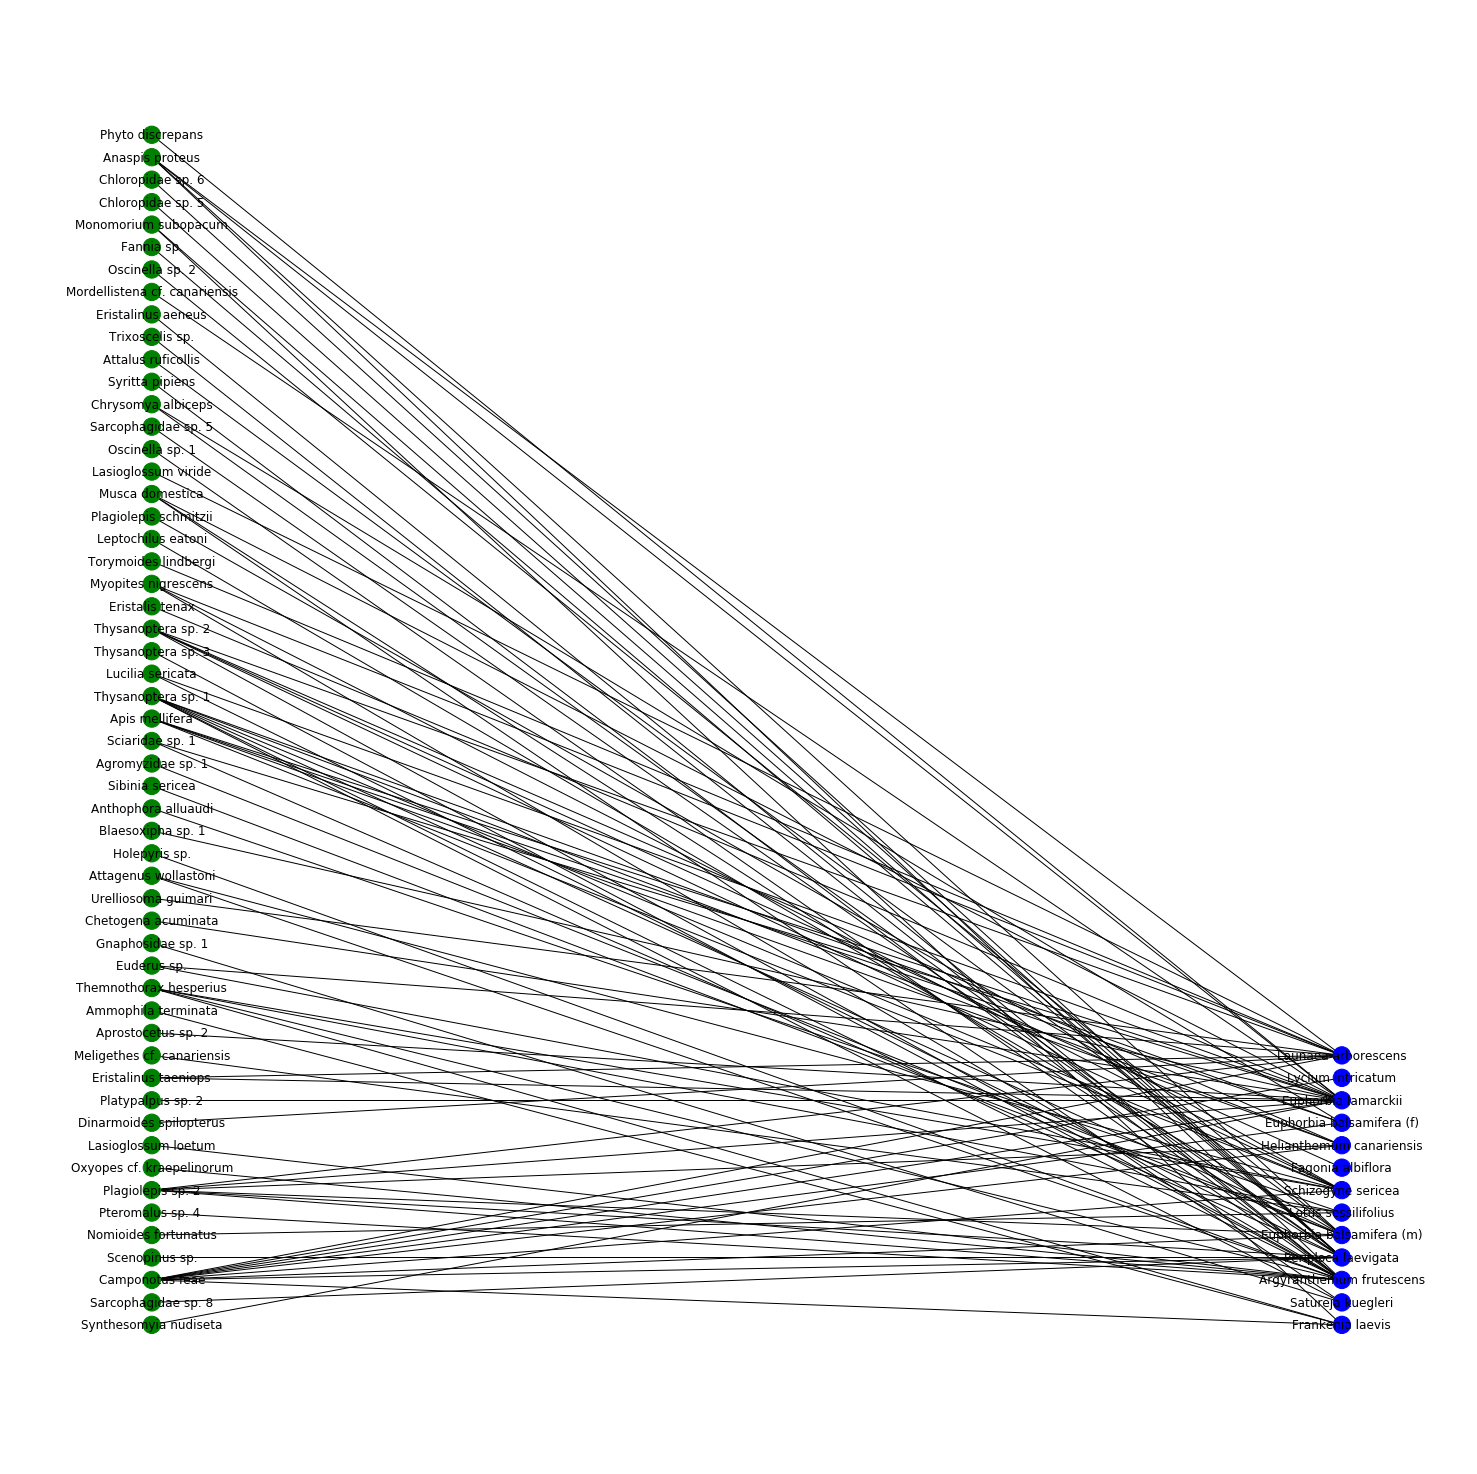

In [9]:
plot_bipartite1(g[5])

In [10]:
#create DFs for each graph
#https://stackoverflow.com/questions/9415785/merging-several-python-dictionaries

df = []
for i in range(len(g)):
    super_dict = {}
    dicts = [nx.degree(g[i]),nx.betweenness_centrality(g[i]),nx.pagerank(g[i])]
    for d in dicts:
        for k, v in d.iteritems():  # d.items() in Python 3+
            super_dict.setdefault(k, []).append(v)    
    test = pd.DataFrame.from_dict(super_dict, orient ='index')
    test.columns = ['degree', 'betweenness','pagerank']
    test['network'] = i
    test['name'] = test.index.tolist()
    df.append(test)

In [11]:
#a dataframe that contains all of the information for every node, with the network
#that they appear in specified
all_df = pd.DataFrame()
for i in range(len(df)):
    all_df = all_df.append(df[i])

In [12]:
#only look at network 2
all_df[all_df['network'] == 2].head()

,degree,betweenness,pagerank,network,name
Camponotus feae,7,0.154434,0.109256,2,Camponotus feae
Scaeva albomaculata,1,0.000000,0.004808,2,Scaeva albomaculata
Musca domestica,4,0.033547,0.017075,2,Musca domestica
Colletes dimidiatus,3,0.014807,0.011424,2,Colletes dimidiatus
Attalus obscurus,6,0.192861,0.027890,2,Attalus obscurus


In [13]:
#look at a particular node across all networks
all_df[all_df['name'] == 'Camponotus feae']

,degree,betweenness,pagerank,network,name
Camponotus feae,1,0.000000,0.006221,0,Camponotus feae
Camponotus feae,7,0.154434,0.109256,2,Camponotus feae
Camponotus feae,7,0.344583,0.158813,3,Camponotus feae
Camponotus feae,12,0.462328,0.206673,4,Camponotus feae
Camponotus feae,9,0.222731,0.058400,5,Camponotus feae
Camponotus feae,12,0.437201,0.153484,6,Camponotus feae
Camponotus feae,15,0.555453,0.136171,7,Camponotus feae
Camponotus feae,6,0.214445,0.125753,8,Camponotus feae
Camponotus feae,7,0.206647,0.100261,9,Camponotus feae
Camponotus feae,7,0.241026,0.200050,10,Camponotus feae
